Image Load


EasyOCR + drawline

In [1]:
# Use EasyOCR
# pdf를 바로 읽을 수 없음 
# convert_from_path : PDF의 각 페이지가 PIL 이미지 객체로 변환되어 리스트에 담겨 나온다
from pdf2image import convert_from_path
import numpy as np
import easyocr
import matplotlib.pyplot as plt

# pdf -> image
pages = convert_from_path('./Image_AI_1.pdf', dpi=300)

reader = easyocr.Reader(['ko', 'en'])

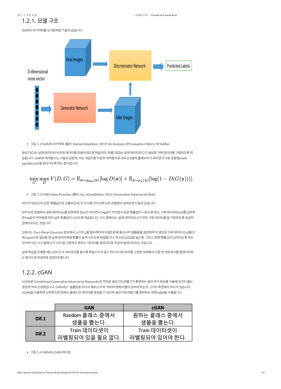

In [2]:
# 2페이지 이미지+텍스트 출력
PIL_image = pages[1]
plt.imshow(PIL_image)
plt.axis('off')
plt.show()

In [3]:
# OCR 수행
# result : bbox, text, prob
result_easyocr = reader.readtext(np.array(PIL_image))
print(f"Page{1} 결과:\n")

# 5번째 박스까지만 
for idx, (bbox, text, prob) in enumerate(result_easyocr[:5]):
    if idx == 0:    
        print("bbox\n")
        print(f"{bbox}\n")
    elif idx == 1:  
        print("text\n")
        print(f"{text}\n")
    else:   
        print("prob\n")
        print(f"{prob}\n")
        

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Page1 결과:

bbox

[[np.int32(93), np.int32(59)], [np.int32(371), np.int32(59)], [np.int32(371), np.int32(99)], [np.int32(93), np.int32(99)]]

text

1.GAN 소개

prob

0.6347136389664059

prob

0.9096482900505103

prob

0.5959996571055686



[INFO] 0.8740: 25.7.7. 오후 11:53
[INFO] 0.9992: 1.GAN 소개
[INFO] 0.6347: PseudoLab Tutorial Book
[INFO] 0.9096: 1.2.1. 모델 구조
[INFO] 0.5960: GAN의 아키택처지 도식화하면 다음과 같습니다:
[INFO] 0.8577: Reallmages
[INFO] 0.8264: Discriminator Network
[INFO] 0.6487: Predicted Labels
[INFO] 0.7470: D-dimensional
[INFO] 0.9543: noise Vector
[INFO] 0.9996: Generator Network
[INFO] 0.8899: Fake Images
[INFO] 0.6765: 그림 1-2 GAN의 아키택처 (출처: Hamed Alqahtani. 2019.An Analysis Of Evaluation Metric Of GANs)
[INFO] 0.2152: 생성기(G눈 실제 데이터와 비슷한 데이터들 만들어내도록 학습되며 , 판별기(D는 실제 데이터와 G가 생성한 가짜 데이터들 구별하도록 학
[INFO] 0.2551: 습월니다: GAN의 목적함수는 다음과 같은데 이논 게임이론 타입의 목적함수로 G와 D 2명의 플레이어가 싸우면서 서로 균형점(nash
[INFO] 0.5052: equilibrium)올 찾아가도록 하는 방식입니다:
[INFO] 0.9299: min max
[INFO] 0.9843: V(D,G)
[INFO] 0.9998: =
[INFO] 0.5446: (a)[log D(a)] +
[INFO] 0.3365: (z)[log(1 - D(G(z)))]:
[INFO] 0.9999: D
[INFO] 0.5459: 그림 1-3 GAN Value Function (출처: lan JGoodfellow. 2014. Generative Adversarial Nets)
[INFO] 0.3832: 여기서 V(DG)의 값은 확출값으로 도출되논데, 이 수식올 각각

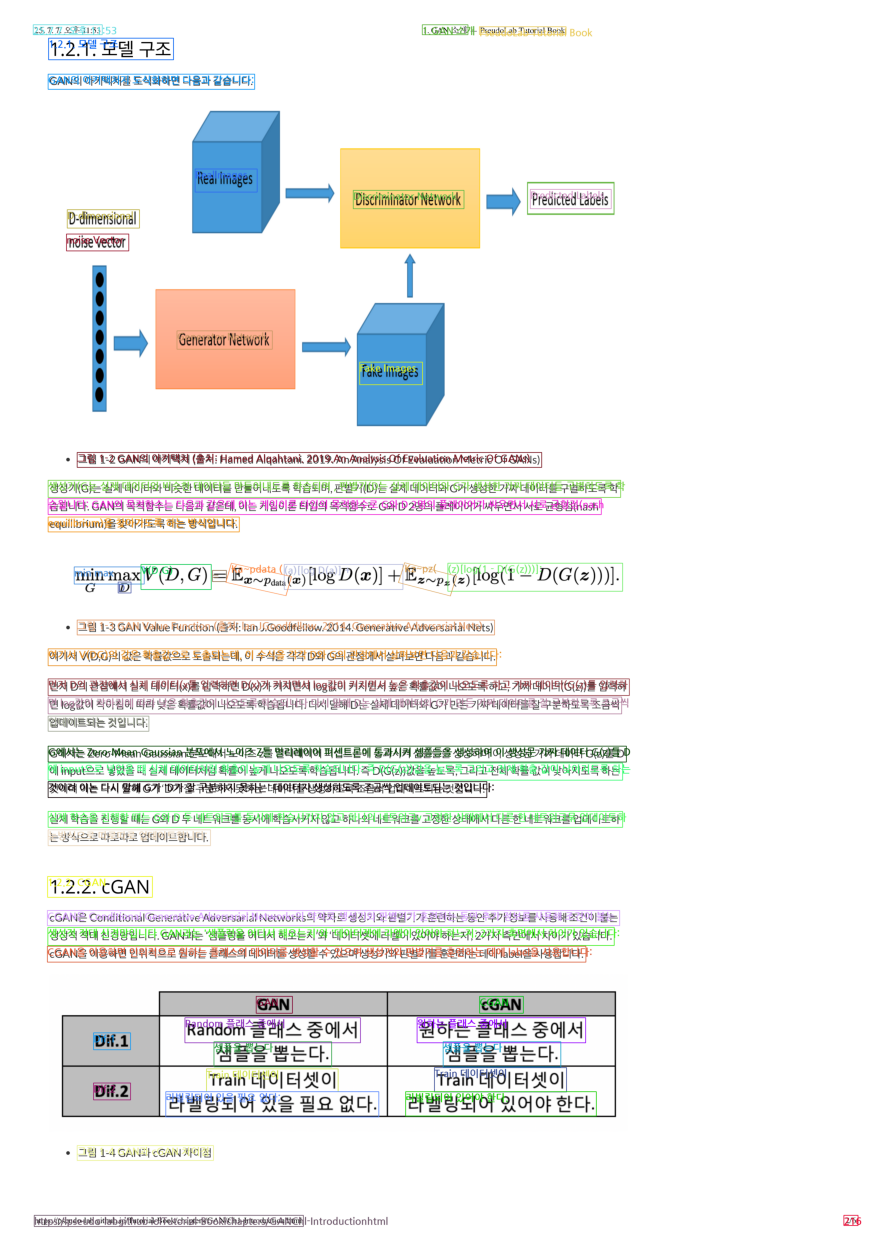

In [4]:
from PIL import ImageFont, ImageDraw, Image
from matplotlib import font_manager

draw = ImageDraw.Draw(PIL_image)
font = ImageFont.truetype('NanumGothicBold.ttf', 40)

# 박스 색상 지정
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(255, 3), dtype='uint8')

# OCR 시각화
for i, (bbox, text, prob) in enumerate(result_easyocr):
    print("[INFO] {:.4f}: {}".format(prob, text))
    color = tuple(map(int, COLORS[i]))

    pts = [tuple(map(int, point)) for point in bbox]
    draw.line(pts + [pts[0]], width=3, fill=color) 
    draw.text(pts[0], text, font=font, fill=color)    # 한국어 텍스트 표시 

plt.figure(figsize=(12, 16))
plt.imshow(pages[1])
plt.axis('off')
plt.show()

Tesseract OCR

In [5]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 0)

# PIL image -> NumPy 배열로 변환
# OpenCV, pytesseract, TensorFlow, PyTorch 등에서 사용가능
opencv_image = np.array(PIL_image)  
result_tesseract = pytesseract.image_to_data(opencv_image, lang='kor+eng', output_type='dict')

bounding box

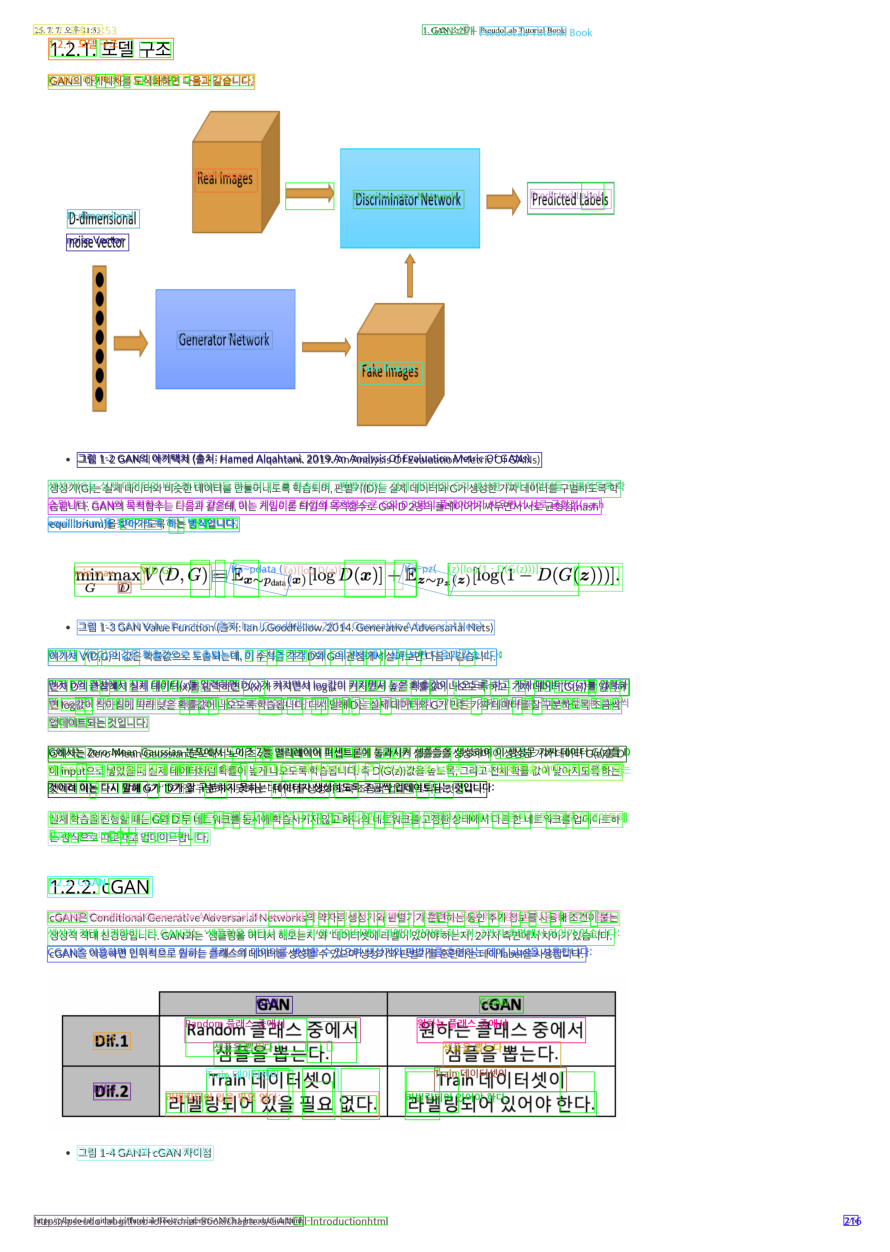

In [6]:
img_copy = opencv_image.copy()
font = ImageFont.truetype("NanumGothicBold.ttf", size=24)
n_boxes = len(result_tesseract['text'])

for i in range(n_boxes):
    if int(result_tesseract['conf'][i]) > 0 and result_tesseract['text'][i].strip() != "":
        (x, y, w, h) = (result_tesseract['left'][i], result_tesseract['top'][i], result_tesseract['width'][i], result_tesseract['height'][i],)
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
        draw.text((x, y - 100), result_tesseract['text'][i], font=font, fill=(255, 0, 0))

        
plt.figure(figsize=(12, 16))
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [7]:
df = pd.DataFrame(result_tesseract)

# 단어나 한 글자로 쪼개져있음
for i in range(len(df)):
    if int(result_tesseract["conf"][i]) > 50 and result_tesseract["text"][i].strip() != "":
        print(f"Text : {result_tesseract['text'][i]}, Conf : {result_tesseract['conf'][i]}, Position : ({result_tesseract['left'][i]}, {result_tesseract['top'][i]})")

Text : 1239, Conf : 53, Position : (160, 119)
Text : Gal, Conf : 58, Position : (362, 119)
Text : 구조, Conf : 96, Position : (522, 129)
Text : 야, Conf : 78, Position : (310, 264)
Text : 키, Conf : 66, Position : (347, 259)
Text : 텍, Conf : 90, Position : (384, 259)
Text : 채, Conf : 86, Position : (422, 264)
Text : 플, Conf : 86, Position : (459, 259)
Text : 토, Conf : 80, Position : (506, 266)
Text : 식, Conf : 93, Position : (543, 264)
Text : 확, Conf : 88, Position : (580, 264)
Text : 하, Conf : 93, Position : (617, 264)
Text : 면, Conf : 92, Position : (654, 264)
Text : 다, Conf : 91, Position : (705, 267)
Text : 을과, Conf : 72, Position : (721, 264)
Text : 같습니다:, Conf : 96, Position : (819, 264)
Text : —), Conf : 57, Position : (1110, 696)
Text : 히, Conf : 85, Position : (640, 2044)
Text : 는, Conf : 93, Position : (676, 2044)
Text : 방, Conf : 92, Position : (724, 2049)
Text : 식, Conf : 93, Position : (760, 2048)
Text : 입니다:, Conf : 91, Position : (793, 2048)
Text : =, Conf : 62, Position : (

한 문장으로 묶기

In [8]:
df = df[df['conf'] != -1]

grouped_lines = df.groupby(['page_num', 'block_num', 'par_num', 'line_num'])

for key, group in grouped_lines:
    line_text = ' '.join(group['text'].fillna('').tolist())
    line_conf = group['conf'].astype('float').mean()

    if line_text != ' ':
        print(f"문장 : {line_text}")
        print(f" -> 평균 신뢰도 : {round(line_conf, 2)}%\n")

문장 : 1239 Gal 구조
 -> 평균 신뢰도 : 69.0%

문장 : GCANS| 야 키 텍 채 플 토 식 확 하 면 다 을과 같습니다:
 -> 평균 신뢰도 : 82.29%

문장 : —) Presicrs bab
 -> 평균 신뢰도 : 32.33%

문장 : moe Vector
 -> 평균 신뢰도 : 0.0%

문장 : equilibrium se SOMES 히 는 방 식 입니다:
 -> 평균 신뢰도 : 61.38%

문장 : minmaxV(D, GC) = Ean pia(e)llo8 D(w)] +B 2p, (\lloa(l — D(G(2))))
 -> 평균 신뢰도 : 17.36%

문장 : OI WD GRIGS SSG SSSA, 이 수 석 을 각각 Det Goll BAUS OHM tae ee PSP bes arp
 -> 평균 신뢰도 : 38.95%

문장 : Al 에 관 첨 에 서 실체 테 이 터 (※“ 롬 Sah Deo AAI legzk6| 켜 지 변 셔 높은 See gol ies ala 가 짜 메 떠 버 ((5(02) 를 임 력 하
 -> 평균 신뢰도 : 63.57%

문장 : B 168 값 이 작 야 짐 에 따라 낮은 확 률 값 에 나 오도록: Sree UC 다 세 멸 해 ' ㅁ 는 실 제 데 이 터 와카 만 든 카 짜 떼 이 터 플 촬 끄 분 하 로 록 조 큼 씩 !
 -> 평균 신뢰도 : 61.53%

문장 : 얼 데 이 트 되는 ALICE
 -> 평균 신뢰도 : 80.67%

문장 : GUIS Zenes Wren Gaussian Us 들 멀 리 레이어 펴 센 트 론 에 동 과 시 켜 SESS SSA Ole THEA EE bp
 -> 평균 신뢰도 : 53.38%

문장 : 에 106 배 으로 넣었을 때 실체 데 이 터 처럼 확 률 에 SoM SSS SSlic SD Cees e Se Mase etol Woks S SS
 -> 평균 신뢰도 : 51.88%

문장 : Role 이 논 타시 말해 G7 D7 ese Sapte Al ALAS BE a> eG O

JSONL 파일로 저장

JSONL : Json Lines</br>
JSON 내부에 한 줄씩 JSON을 저장할 수 있는 구조화된 데이터 형식</br>

규칙</br>
1. UTF-8 인코딩</br>
2. 각 행들은 JSON 형식이어야함</br>
3. 각 줄은 \n으로 구분되어야함</br>


In [35]:
import json

filename = "Text_AI_2"
page_num = 2
output_path = f"{filename}_page_{page_num}_easyOCR.jsonl"

# OCR 종류에 따른 JSONL 파일 작성
def OcrToJSONL(result_easyocr, grouped_lines, output_path): 
    ocrType = output_path.split('_')[-1].split('.')[0]
    with open(output_path, 'w', encoding='utf-8') as f:
        if ocrType == 'easyOCR' and result_easyocr:
            for bbox, text, prob in result_easyocr:
                item = {
                    "doc_id" : f"{filename}_page_{page_num}",
                    "page" : page_num,
                    "bbox" : [[int(x), int(y)] for x, y in bbox],
                    "text" : text,
                    "confidence" : round(float(prob)*100, 4)
                }
                f.write(json.dumps(item, ensure_ascii=False) + "\n")
        elif ocrType != 'easyOCR' and grouped_lines is not None:
            for key, group in grouped_lines:
                line_text = ' '.join(group['text'].fillna('').tolist()).strip()
                if line_text:
                    line_conf = group['conf'].astype('float').mean()
                    item = {
                        "doc_id" : f"{filename}_page_{page_num}",
                        "page" : page_num,
                        "text" : line_text,
                        "confidence" : round(float(line_conf), 4)
                    }
                    f.write(json.dumps(item, ensure_ascii=False) + "\n")

In [32]:
output_path = f"{filename}_page_{page_num}_easyOCR.jsonl"
OcrToJSONL(result_easyocr, '', output_path)

In [36]:
output_path = f"{filename}_page_{page_num}_tesseractOCR.jsonl"
OcrToJSONL('', grouped_lines, output_path)

OCR 신뢰도</br>

신뢰도 0.5 이상 개수 / 0.5 이하 개수</br>
신뢰도 0.5 '이상'에서 한글 포함 개수</br>
신뢰도 0.5 '이하'에서 한글 포함 개수</br>

In [38]:
import re

# 정규식
def contains_korean(text):
    return bool(re.search(r"[가-힣]", text))

prob_half_over, prob_half_under = 0, 0
half_over_inKorean, half_over_NotinKorean = 0, 0
half_under_inKorean, half_under_NotinKorean = 0, 0
confSum, fileLen = 0, 0

def ConfandContainsKorean(output_path, prob_half_over, prob_half_under, half_over_inKorean, half_over_NotinKorean, half_under_inKorean, half_under_NotinKorean, confSum, fileLen):
    ocrType = output_path.split('_')[-1].split('.')[0]
    with open (output_path, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            text, prob = data["text"], data["confidence"]
            confSum += prob
            fileLen += 1
            if prob >= 50:
                prob_half_over += 1
                if contains_korean(text):   half_over_inKorean += 1
                else:   half_over_NotinKorean += 1
            else:
                prob_half_under += 1
                if contains_korean(text):   half_under_inKorean += 1
                else:   half_under_NotinKorean += 1

    if ocrType == 'easyOCR':    print("easyOCR")
    else:   print("tesseractOCR")

    print(f"신뢰도 50% 이상 개수(총) : {prob_half_over}")
    print(f"신뢰도 50% 이상 개수(한글 포함) : {half_over_inKorean}, {round(float(half_over_inKorean/prob_half_over), 2)*100}%")
    print(f"신뢰도 50% 이상 개수(한글 미포함) : {half_over_NotinKorean}, {round(float(half_over_NotinKorean/prob_half_over), 2)*100}%")
    print("--------------------------------")
    print(f"신뢰도 50% 이하 개수(총) : {prob_half_under}")
    print(f"신뢰도 50% 이하 개수(한글 포함) : {half_under_inKorean}, {round(float(half_under_inKorean/prob_half_under), 2)*100}%")
    print(f"신뢰도 50% 이하 개수(한글 미포함) : {half_under_NotinKorean}, {round(float(half_under_NotinKorean/prob_half_under), 2)*100}%")
    print("--------------------------------")
    print(f"신뢰도 평균 : {round(float(confSum/fileLen), 2)}%")
        
                        

easyOCR 신뢰도

In [39]:
output_path = output_path = f"{filename}_page_{page_num}_easyOCR.jsonl"
ConfandContainsKorean(output_path, prob_half_over, prob_half_under, half_over_inKorean, half_over_NotinKorean, half_under_inKorean, half_under_NotinKorean, confSum, fileLen)

easyOCR
신뢰도 50% 이상 개수(총) : 34
신뢰도 50% 이상 개수(한글 포함) : 13, 38.0%
신뢰도 50% 이상 개수(한글 미포함) : 21, 62.0%
--------------------------------
신뢰도 50% 이하 개수(총) : 19
신뢰도 50% 이하 개수(한글 포함) : 17, 89.0%
신뢰도 50% 이하 개수(한글 미포함) : 2, 11.0%
--------------------------------
신뢰도 평균 : 59.11%


tesseractOCR 신뢰도</br>

In [40]:
output_path = f"{filename}_page_{page_num}_tesseractOCR.jsonl"
ConfandContainsKorean(output_path, prob_half_over, prob_half_under, half_over_inKorean, half_over_NotinKorean, half_under_inKorean, half_under_NotinKorean, confSum, fileLen)

tesseractOCR
신뢰도 50% 이상 개수(총) : 12
신뢰도 50% 이상 개수(한글 포함) : 11, 92.0%
신뢰도 50% 이상 개수(한글 미포함) : 1, 8.0%
--------------------------------
신뢰도 50% 이하 개수(총) : 10
신뢰도 50% 이하 개수(한글 포함) : 4, 40.0%
신뢰도 50% 이하 개수(한글 미포함) : 6, 60.0%
--------------------------------
신뢰도 평균 : 50.23%


결론 : 문장 인식 개수와 신뢰도 자체는 easyOCR이 높으나 높은 신뢰도에서 한글 인식률은 tesseractOCR이 높다